In [3]:
""" Loan default prediction involves classifying whether a borrower will default on a loan
 based on historical data. This is a binary classification problem where the target variable
  indicates loan default (e.g., 1 for default, 0 for no default.) """

' Loan default prediction involves classifying whether a borrower will default on a loan\n based on historical data. This is a binary classification problem where the target variable\n  indicates loan default (e.g., 1 for default, 0 for no default.) '

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

ds_path = '/Users/denista/.data/LoanDefault/loan_default.csv'
data1 = pd.read_csv(ds_path)

In [5]:
print("Dataset Head:")
print(data1.head())
print("\nDataset Info:")
data1.info()
print("\nDataset Description:")
print(data1.describe())
print("\n Missing Values:")
print(data1.isnull().sum())

Dataset Head:
       LoanID  Age  Income  LoanAmount  CreditScore  MonthsEmployed  \
0  I38PQUQS96   56   85994       50587          520              80   
1  HPSK72WA7R   69   50432      124440          458              15   
2  C1OZ6DPJ8Y   46   84208      129188          451              26   
3  V2KKSFM3UN   32   31713       44799          743               0   
4  EY08JDHTZP   60   20437        9139          633               8   

   NumCreditLines  InterestRate  LoanTerm  DTIRatio    Education  \
0               4         15.23        36      0.44   Bachelor's   
1               1          4.81        60      0.68     Master's   
2               3         21.17        24      0.31     Master's   
3               3          7.07        24      0.23  High School   
4               4          6.51        48      0.73   Bachelor's   

  EmploymentType MaritalStatus HasMortgage HasDependents LoanPurpose  \
0      Full-time      Divorced         Yes           Yes       Other   
1     

In [6]:
print("Value counts for the target variable (Default):")
print(data1['Default'].value_counts())

Value counts for the target variable (Default):
Default
0    225694
1     29653
Name: count, dtype: int64


In [7]:
data1['Default'] = data1['Default'].astype('category')

binary_columns = ['HasMortgage', 'HasDependents', 'HasCoSigner']
for col in binary_columns:
    data1[col] = data1[col].map({'Yes': 1, 'No': 0})

categorical_columns = ['Education', 'EmploymentType', 'MaritalStatus', 'LoanPurpose']
for col in categorical_columns:
    print(f"Unique values in {col}: {data1[col].unique()}")

#One-hot encoding
data2 = pd.get_dummies(data1, columns = categorical_columns, drop_first = True)
#Encoded results have 'bool' type, convert to int.
bool_columns = data2.select_dtypes(include=['bool']).columns
data2[bool_columns] = data2[bool_columns].astype('int')

data2 = data2.drop(columns=['LoanID'])

print("\nUpdated Data Types:")
print(data2.dtypes)

Unique values in Education: ["Bachelor's" "Master's" 'High School' 'PhD']
Unique values in EmploymentType: ['Full-time' 'Unemployed' 'Self-employed' 'Part-time']
Unique values in MaritalStatus: ['Divorced' 'Married' 'Single']
Unique values in LoanPurpose: ['Other' 'Auto' 'Business' 'Home' 'Education']

Updated Data Types:
Age                                int64
Income                             int64
LoanAmount                         int64
CreditScore                        int64
MonthsEmployed                     int64
NumCreditLines                     int64
InterestRate                     float64
LoanTerm                           int64
DTIRatio                         float64
HasMortgage                        int64
HasDependents                      int64
HasCoSigner                        int64
Default                         category
Education_High School              int32
Education_Master's                 int32
Education_PhD                      int32
EmploymentType_Part-

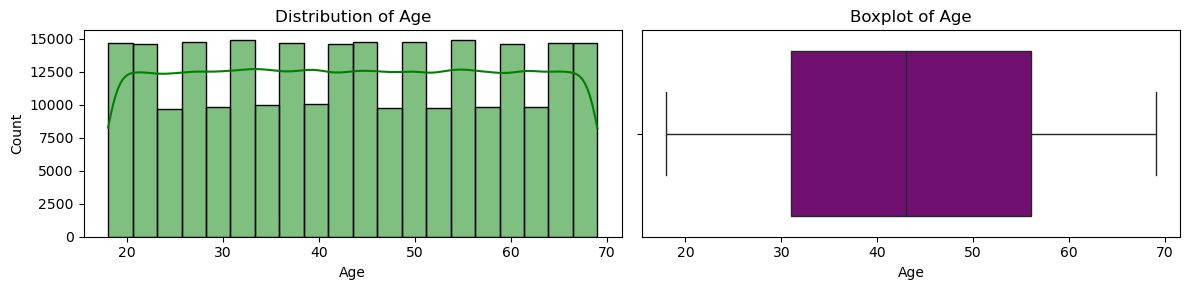

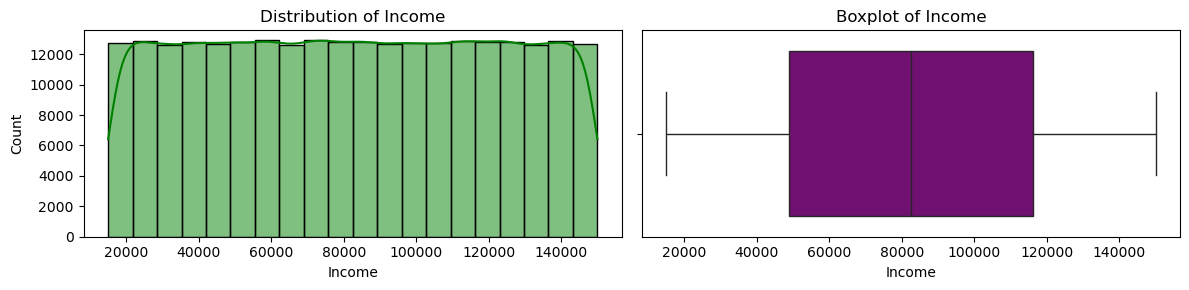

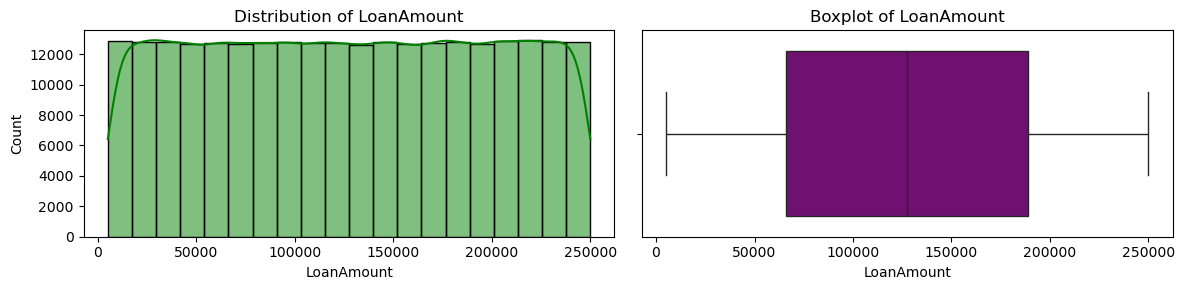

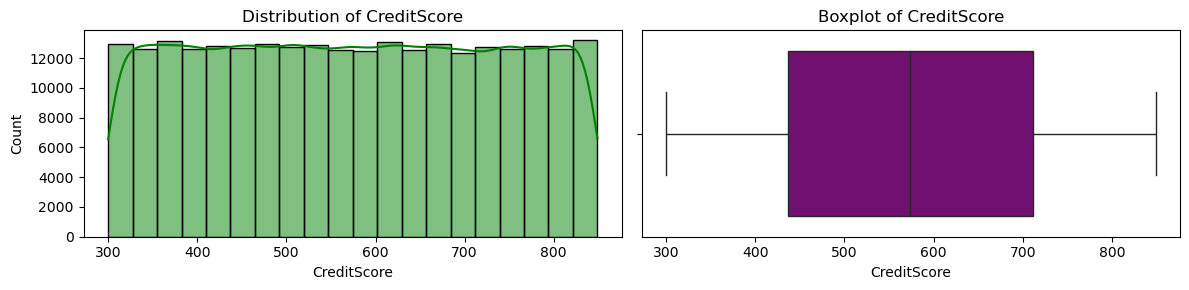

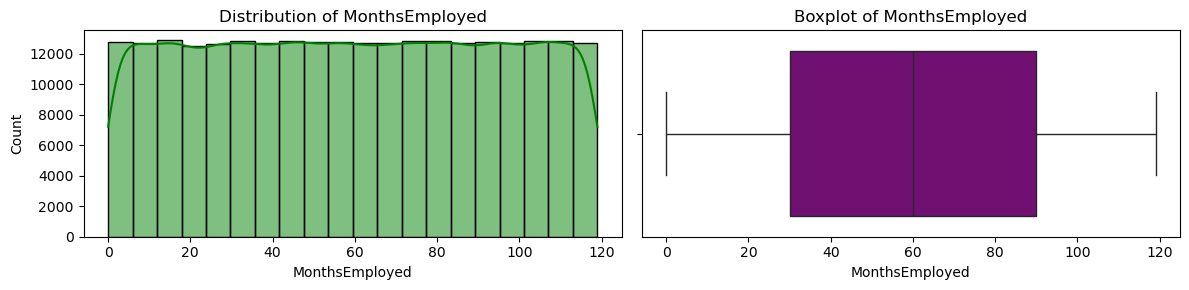

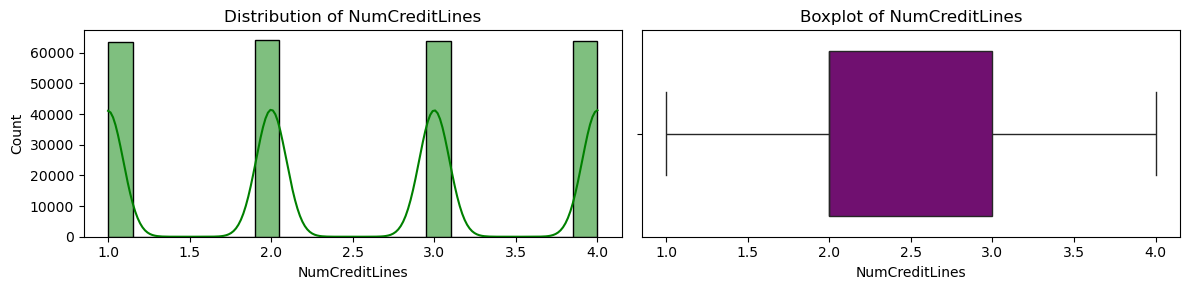

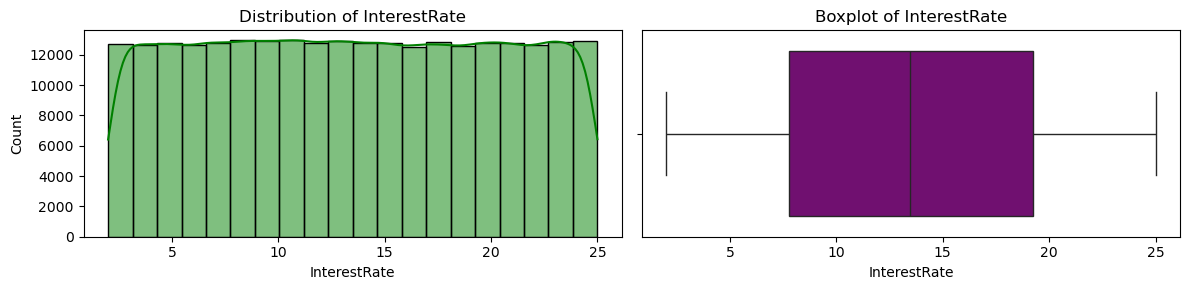

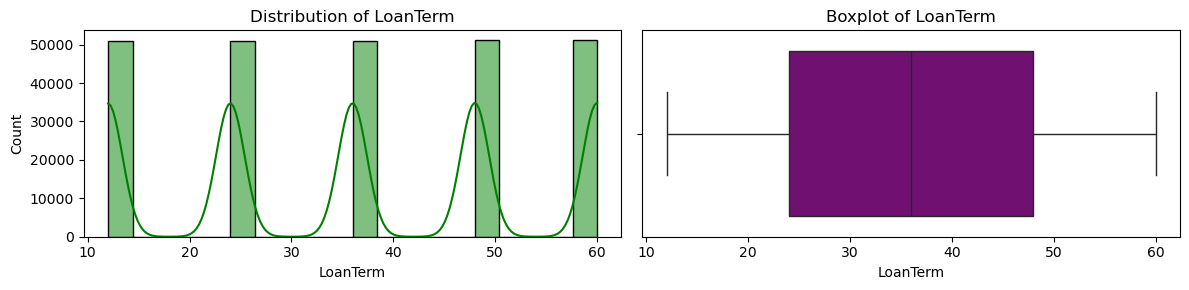

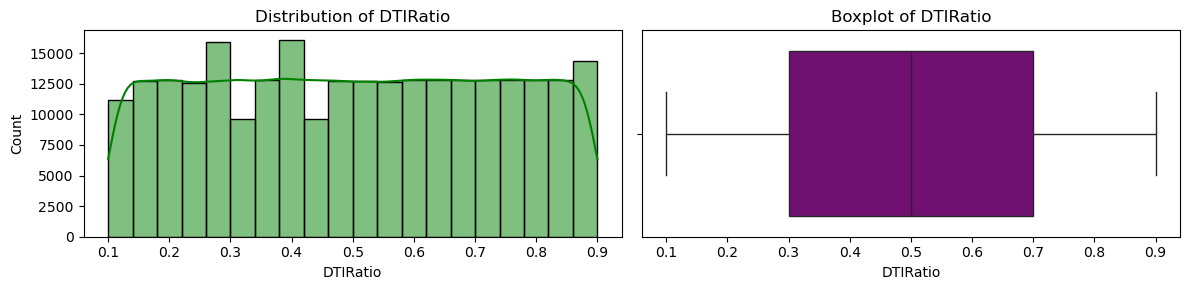

In [8]:
numerical_columns = [col for col in data2.select_dtypes(include=['int64', 'float64']).columns if col not in binary_columns]

for col in numerical_columns:
    plt.figure(figsize=(12, 3))
    plt.subplot(1, 2, 1)
    sns.histplot(data2[col], kde=True, bins=20, color='green')
    plt.title(f'Distribution of {col}')

    plt.subplot(1, 2, 2)
    sns.boxplot(x=data2[col], color='purple')
    plt.title(f'Boxplot of {col}')

    plt.tight_layout()
    plt.show()

In [9]:
for col in numerical_columns:
    Q1 = data2[col].quantile(0.25)
    Q3 = data2[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = ((data2[col] < lower_bound) | (data2[col] > upper_bound)).sum()
    print(f"{col}: {outliers} outliers detected.")

Age: 0 outliers detected.
Income: 0 outliers detected.
LoanAmount: 0 outliers detected.
CreditScore: 0 outliers detected.
MonthsEmployed: 0 outliers detected.
NumCreditLines: 0 outliers detected.
InterestRate: 0 outliers detected.
LoanTerm: 0 outliers detected.
DTIRatio: 0 outliers detected.


In [10]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
data2[numerical_columns] = scaler.fit_transform(data2[numerical_columns])

print("\nScaled Numerical Features (min,max):")
for col in numerical_columns:
    print(f"{col}: Min = {data2[col].min():.2f}, Max = {data2[col].max():.2f}")



Scaled Numerical Features (min,max):
Age: Min = 0.00, Max = 1.00
Income: Min = 0.00, Max = 1.00
LoanAmount: Min = 0.00, Max = 1.00
CreditScore: Min = 0.00, Max = 1.00
MonthsEmployed: Min = 0.00, Max = 1.00
NumCreditLines: Min = 0.00, Max = 1.00
InterestRate: Min = 0.00, Max = 1.00
LoanTerm: Min = 0.00, Max = 1.00
DTIRatio: Min = 0.00, Max = 1.00


<function matplotlib.pyplot.show(close=None, block=None)>

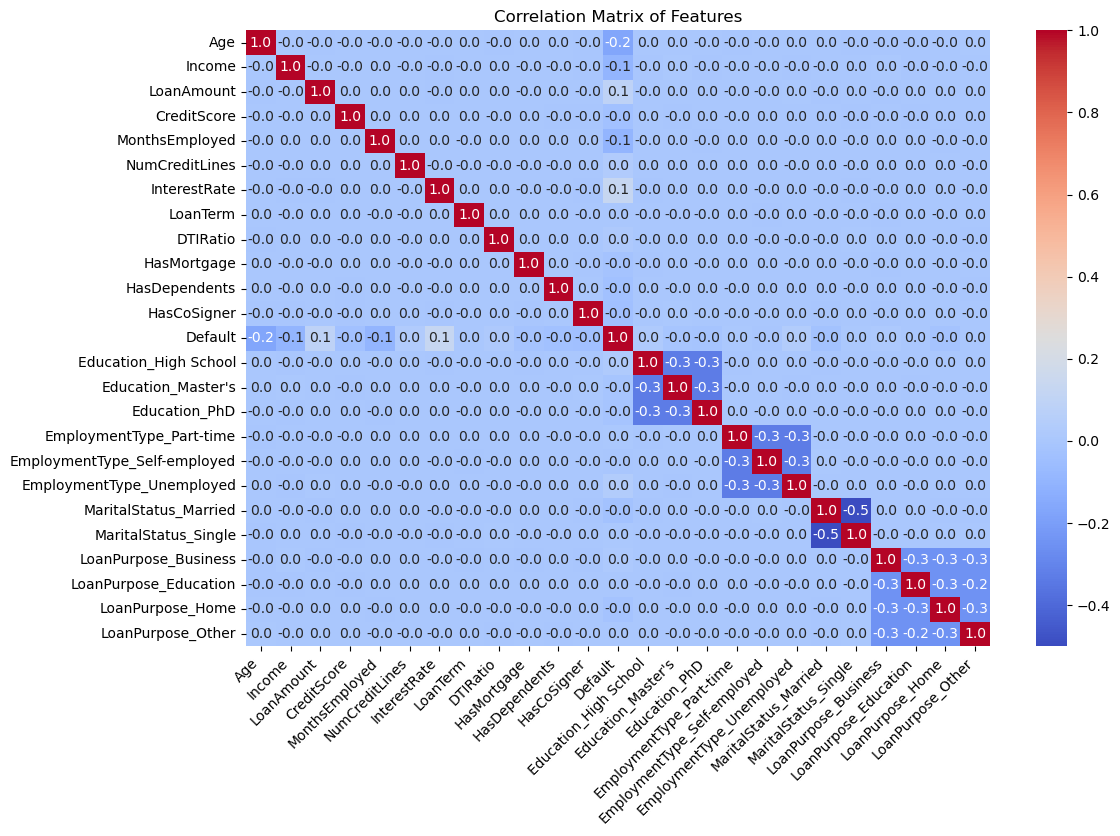

In [57]:
plt.figure(figsize=(12,8))
correlation_matrix = data2.corr()

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.1f', cbar=True)
plt.title("Correlation Matrix of Features")
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.show

In [12]:
correlation_with_target = correlation_matrix['Default'].sort_values(ascending=False)
print("Correlation with Target Variable (Default):")
print(correlation_with_target)

Correlation with Target Variable (Default):
Default                         1.000000
InterestRate                    0.131273
LoanAmount                      0.086659
EmploymentType_Unemployed       0.034957
NumCreditLines                  0.028330
Education_High School           0.022831
DTIRatio                        0.019236
LoanPurpose_Business            0.011162
MaritalStatus_Single            0.006607
EmploymentType_Part-time        0.006372
LoanPurpose_Education           0.003512
LoanPurpose_Other               0.002737
LoanTerm                        0.000545
EmploymentType_Self-employed   -0.002714
Education_Master's             -0.013314
Education_PhD                  -0.018447
LoanPurpose_Home               -0.021564
HasMortgage                    -0.022856
MaritalStatus_Married          -0.026875
CreditScore                    -0.034166
HasDependents                  -0.034678
HasCoSigner                    -0.039109
MonthsEmployed                 -0.097374
Income       


Default Rates by HasMortgage:
HasMortgage
0    0.123451
1    0.108806
Name: Default, dtype: float64


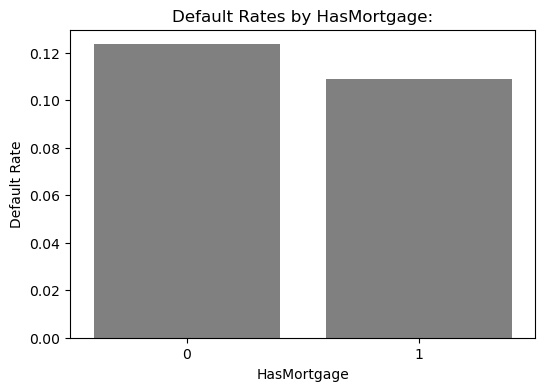


Default Rates by HasDependents:
HasDependents
0    0.127244
1    0.105024
Name: Default, dtype: float64


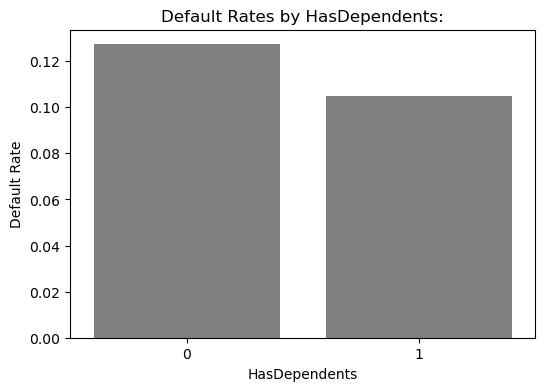


Default Rates by HasCoSigner:
HasCoSigner
0    0.128661
1    0.103601
Name: Default, dtype: float64


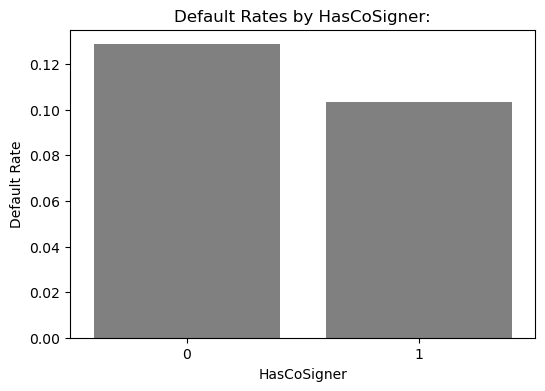

In [13]:
data2['Default'] = data2['Default'].astype(int)
categorical_analysis = ['HasMortgage', 'HasDependents', 'HasCoSigner']
for col in categorical_analysis:
    group_behavior = data2.groupby(col)['Default'].mean()
    print(f"\nDefault Rates by {col}:")
    print(group_behavior)

    plt.figure(figsize=(6,4))
    sns.barplot(x=group_behavior.index, y=group_behavior.values, color='grey')
    plt.title(f"Default Rates by {col}:")
    plt.xlabel(col)
    plt.ylabel("Default Rate")
    plt.show()


Feature Importance:
                         Feature  Importance
1                         Income    0.125831
6                   InterestRate    0.120880
2                     LoanAmount    0.113802
0                            Age    0.102876
3                    CreditScore    0.100193
4                 MonthsEmployed    0.097469
8                       DTIRatio    0.088256
7                       LoanTerm    0.040591
5                 NumCreditLines    0.032557
9                    HasMortgage    0.014412
19          MaritalStatus_Single    0.014058
15      EmploymentType_Part-time    0.012086
20          LoanPurpose_Business    0.012055
23             LoanPurpose_Other    0.012002
18         MaritalStatus_Married    0.011915
21         LoanPurpose_Education    0.011857
16  EmploymentType_Self-employed    0.011846
13            Education_Master's    0.011795
12         Education_High School    0.011568
10                 HasDependents    0.011413
14                 Education_PhD   

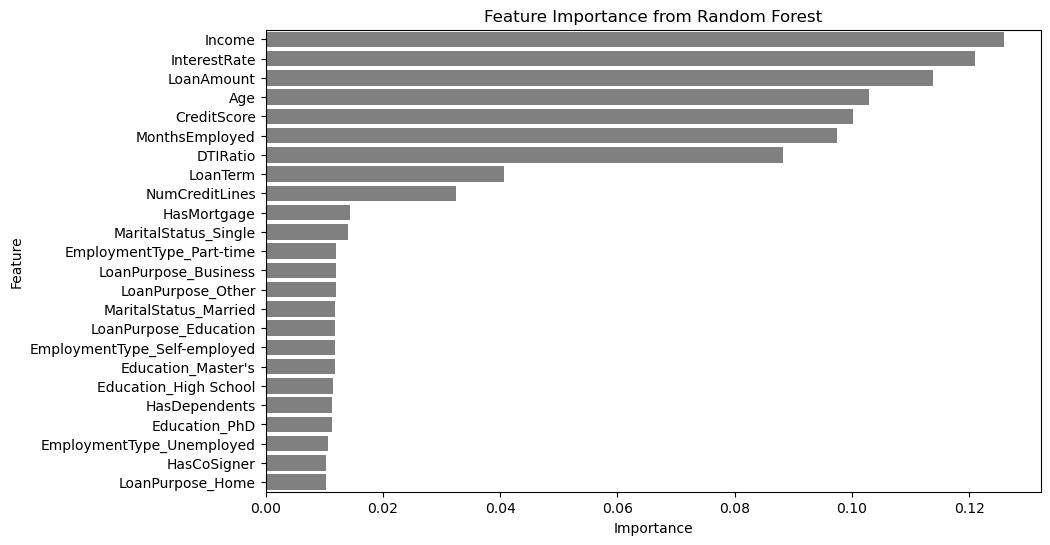

In [15]:
from sklearn.ensemble import RandomForestClassifier

X = data2.drop(columns=['Default'])
y = data2['Default']

rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X, y)

feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

print("Feature Importance:")
print(feature_importances)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importances, color='grey')
plt.title("Feature Importance from Random Forest")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()


In [16]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from imblearn.over_sampling import SMOTE

data = data2[['Income', 'InterestRate', 'LoanAmount', 'Age', 'CreditScore', 'MonthsEmployed', 'DTIRatio','Default']]
X = data.drop(columns=['Default']).values
y = data['Default'].values

#70-15-15 split
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=99, stratify=y)
X_test, X_val, y_test, y_val = train_test_split(X_temp, y_temp, test_size=0.5, random_state=99, stratify=y_temp)

#SMOTE resampling on the training set
smote = SMOTE(random_state=99)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

X_train_tensor = torch.tensor(X_train_resampled, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train_resampled, dtype=torch.float32).view(-1,1)
X_val_tensor = torch.tensor(X_val, dtype=torch.float32)
y_val_tensor = torch.tensor(y_val, dtype=torch.float32).view(-1,1)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32).view(-1,1)

from collections import Counter
print("Resampled training data class distribution:")
print(Counter(y_train_resampled))

Resampled training data class distribution:
Counter({0: 157985, 1: 157985})


In [29]:
class LoanDefaultNN(nn.Module):
    def __init__(self, input_size):
        super(LoanDefaultNN, self).__init__()
        self.fc1 = nn.Linear(input_size, 16) #First hidden layer
        self.fc2 = nn.Linear(16,8) #Second hidden layer
        self.fc3 = nn.Linear(8,8) #Third Hidden Layer
        self.output = nn.Linear(8,1) #Output layer

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = torch.relu(self.fc3(x))
        x = torch.sigmoid(self.output(x))
        return x

In [45]:
input_size = X_train_resampled.shape[1]
model = LoanDefaultNN(input_size)

criterion = nn.BCELoss() #Binary Cross-Entropy Loss
optimizer = optim.Adam(model.parameters(), lr=0.005)
num_epochs = 100
batch_size = 32

for epoch in range(num_epochs):
    model.train()
    optimizer.zero_grad()
    y_pred = model(X_train_tensor)
    loss = criterion(y_pred, y_train_tensor)
    loss.backward()
    optimizer.step()

    if (epoch + 1) % 10 == 0:
        print(f"Epoch {epoch+1}/{num_epochs}, Loss: {loss.item():.4f}")

Epoch 10/100, Loss: 0.7048
Epoch 20/100, Loss: 0.6921
Epoch 30/100, Loss: 0.6863
Epoch 40/100, Loss: 0.6696
Epoch 50/100, Loss: 0.6439
Epoch 60/100, Loss: 0.6234
Epoch 70/100, Loss: 0.6145
Epoch 80/100, Loss: 0.6089
Epoch 90/100, Loss: 0.6035
Epoch 100/100, Loss: 0.5989


In [53]:
model.eval()
with torch.no_grad():
    y_val_pred = model(X_val_tensor)
    y_val_pred_class = (y_val_pred > 0.5).float()

threshold = 0.3
y_val_pred_class = (y_val_pred > threshold).float()


accuracy = accuracy_score(y_val, y_val_pred_class.numpy())
precision = precision_score(y_val, y_val_pred_class.numpy())
recall = recall_score(y_val, y_val_pred_class.numpy())
f1 = f1_score(y_val, y_val_pred_class.numpy())
auc = roc_auc_score(y_val, y_val_pred_class.numpy())

print(f"Validation Metrics:\n Accuracy: {accuracy:.4f}, Precision: {precision:.4f}. "
      f"Recall: {recall:.4f}, F1 Score: {f1:.4f}, AUC-ROC: {auc:.4f}")

with torch.no_grad():
    y_test_pred = model(X_test_tensor)
    y_test_pred_class = (y_test_pred > 0.5).float()

y_test_pred_class = (y_test_pred > threshold).float()

accuracy_test = accuracy_score(y_test, y_test_pred_class.numpy())
precision_test = precision_score(y_test, y_test_pred_class.numpy())
recall_test = recall_score(y_test, y_test_pred_class.numpy())
f1_test = f1_score(y_test, y_test_pred_class.numpy())
auc_test = roc_auc_score(y_test, y_test_pred_class.numpy())

print(f"Test Metrics:\n Accuracy: {accuracy_test:.4f}, Precision: {precision_test:.4f}, "
      f"Recall: {recall_test:.4f}, F1 Score: {f1_test:.4f}, AUC-ROC: {auc_test:.4f}")

print("Validation Predictions:", y_val_pred_class.numpy().sum())
print("Test Predictions:", y_test_pred_class.numpy().sum())

Validation Metrics:
 Accuracy: 0.4157, Precision: 0.1538. Recall: 0.8955, F1 Score: 0.2625, AUC-ROC: 0.6241
Test Metrics:
 Accuracy: 0.4164, Precision: 0.1531, Recall: 0.8885, F1 Score: 0.2612, AUC-ROC: 0.6214
Validation Predictions: 25897.0
Test Predictions: 25809.0


In [59]:
from sklearn.metrics import confusion_matrix

cm_val = confusion_matrix(y_val, y_val_pred_class.numpy())
tn_val, fp_val, fn_val, tp_val = cm_val.ravel()
specificity_val = tn_val / (tn_val + fp_val)

cm_test = confusion_matrix(y_test, y_test_pred_class.numpy())
tn_test, fp_test, fn_test, tp_test = cm_test.ravel()
specificity_test = tn_test / (tn_test + fp_test)

# Print both specificities
print(f"Validation Specificity: {specificity_val:.4f}")
print(f"Test Specificity: {specificity_test:.4f}")

Validation Specificity: 0.3527
Test Specificity: 0.3544


In [ ]:
torch.save(model.state_dict(), "final_model.pth")